In [2]:
import numpy as np
import os
import scipy.integrate as integrate
import matplotlib.pyplot as plt

In [3]:
#Load the COSMOS shape catalog (this is the full catalog, both bright and faint)
redshift_distribution = np.load("/Users/jw/Documents/cGAN_project_1/rcGAN/cosmos/nz_full.npy", allow_pickle=True)
#TODO: Is .item needed?

In [4]:
redshift_distribution
print(redshift_distribution.shape)

(550,)


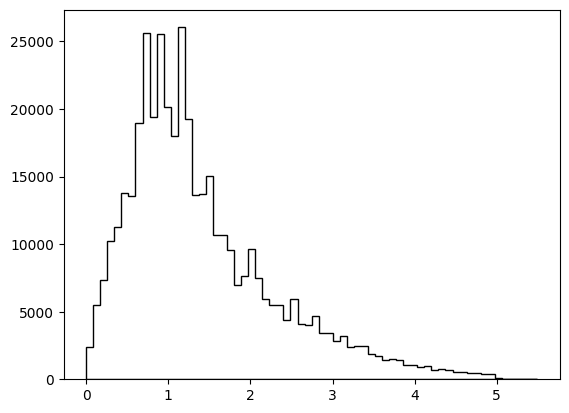

In [6]:
z = np.arange(0, 5.5, .01)
plt.hist(z, weights=redshift_distribution, bins=64, color="white", alpha=1, ec="k", histtype='stepfilled',
     label='full catalog');

In [21]:
redshift_vals = [0, 
                 0.034, 0.070, 0.105, 0.142, 0.179,
                 0.216, 0.255, 0.294, 0.335, 0.376,
                 0.418, 0.462, 0.506, 0.552, 0.599,
                 0.648, 0.698, 0.749, 0.803, 0.858,
                 0.914, 0.973, 1.034, 1.097, 1.163,
                 1.231, 1.302, 1.375, 1.452, 1.532,
                 1.615, 1.703, 1.794, 1.889, 1.989,
                 2.094, 2.203, 2.319, 2.440, 2.568]

#TODO: Check the 41st entry is z = 0.

In [22]:
print(len(redshift_vals))

41


K tot = sum over i (omega i kappa i)
omega i = integral (z i - delta z i /2)(z i + delta z i /2)dz n(z) where n(z) = redshift distribution

1. Load source convergence maps from i = 0, 40
2. Calculate omega i
3. Calculate kappa tot

In [12]:
source_dir = "/Users/jw/Documents/LP006/run001/" 
#Eventually want to iterate over source directories
file_prefix = "kappa"
file_extension = ".dat"

# List all files in the folder
files = os.listdir(source_dir)

required_files = [file for file in files if file.startswith(file_prefix) and file.endswith(file_extension)]

In [15]:
print(len(required_files))
print(required_files)


41
['kappa21.dat', 'kappa35.dat', 'kappa09.dat', 'kappa08.dat', 'kappa34.dat', 'kappa20.dat', 'kappa36.dat', 'kappa22.dat', 'kappa23.dat', 'kappa37.dat', 'kappa33.dat', 'kappa27.dat', 'kappa26.dat', 'kappa32.dat', 'kappa18.dat', 'kappa24.dat', 'kappa30.dat', 'kappa31.dat', 'kappa25.dat', 'kappa19.dat', 'kappa40.dat', 'kappa00.dat', 'kappa14.dat', 'kappa28.dat', 'kappa29.dat', 'kappa15.dat', 'kappa01.dat', 'kappa17.dat', 'kappa03.dat', 'kappa02.dat', 'kappa16.dat', 'kappa12.dat', 'kappa06.dat', 'kappa07.dat', 'kappa13.dat', 'kappa39.dat', 'kappa05.dat', 'kappa11.dat', 'kappa10.dat', 'kappa04.dat', 'kappa38.dat']


In [16]:
def get_file_number(file_name):
    return int(file_name[len(file_prefix):-len(file_extension)])

In [17]:
sorted_files = sorted(required_files, key=get_file_number)

In [19]:
print(sorted_files)
print(len(sorted_files))
#The files are now ordered in ascending redshift.

['kappa00.dat', 'kappa01.dat', 'kappa02.dat', 'kappa03.dat', 'kappa04.dat', 'kappa05.dat', 'kappa06.dat', 'kappa07.dat', 'kappa08.dat', 'kappa09.dat', 'kappa10.dat', 'kappa11.dat', 'kappa12.dat', 'kappa13.dat', 'kappa14.dat', 'kappa15.dat', 'kappa16.dat', 'kappa17.dat', 'kappa18.dat', 'kappa19.dat', 'kappa20.dat', 'kappa21.dat', 'kappa22.dat', 'kappa23.dat', 'kappa24.dat', 'kappa25.dat', 'kappa26.dat', 'kappa27.dat', 'kappa28.dat', 'kappa29.dat', 'kappa30.dat', 'kappa31.dat', 'kappa32.dat', 'kappa33.dat', 'kappa34.dat', 'kappa35.dat', 'kappa36.dat', 'kappa37.dat', 'kappa38.dat', 'kappa39.dat', 'kappa40.dat']
41


In [ ]:
#TODO: turn this all into a larger loop to iterate over all runs and LPs.
ng = 384 #No. of pixels for kappa.
kappa_tot = np.zeros(ng, ng)

for fname in sorted_files:
    full_path = os.path.join(source_dir, fname)
    #load file - look at how is recommended to be done in kappaTNG files
    print(f"loading {fname}...")

    with open (fname, 'rb') as f:
        dummy = np.fromfile(f, dtype="int32", count=1)
        kappa = np.fromfile(f, dtype="float", count=1024*1024)
        dummy = np.fromfile(f, dtype="int32", count=1)  

        kappa = kappa.reshape((1024,1024))
        #Now the convergence map, for some source redshift has been loaded and configured.

        #Next step: calculate omega_i redshift[fname] = i-th z value

        #delta z i / 2
        x = (redshift_vals[fname + 1] - redshift_vals[fname - 1])/2 #TODO: Is this correct for delta z_i?
        #(integrand, lower bound, upper bound)
        omega = integrate.quad(redshift_distribution, redshift_vals[fname] - x, redshift_vals[fname] + x)
        #TODO: check omega is correct form

        kappa_tot += omega * kappa




        


Test: